# Linear regression &ndash; several variables

Models for machine learning can be found in the Python's sklearn library (scikit-learn). FOr more deatils, see https://scikit-learn.org/stable/.

In [14]:
## Import the necessary libraries.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### Open the data and read it in a dataframe.

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/cabin.xlsx')

df

,number,beach,area,electricity,price
0,1,30,50,0,95
1,2,35,42,0,95
2,3,40,25,1,80
3,4,50,30,1,100
4,5,55,45,0,135
5,6,60,24,1,100
6,7,60,60,1,210
7,8,70,34,1,160
8,9,80,32,0,150
9,10,85,28,0,150


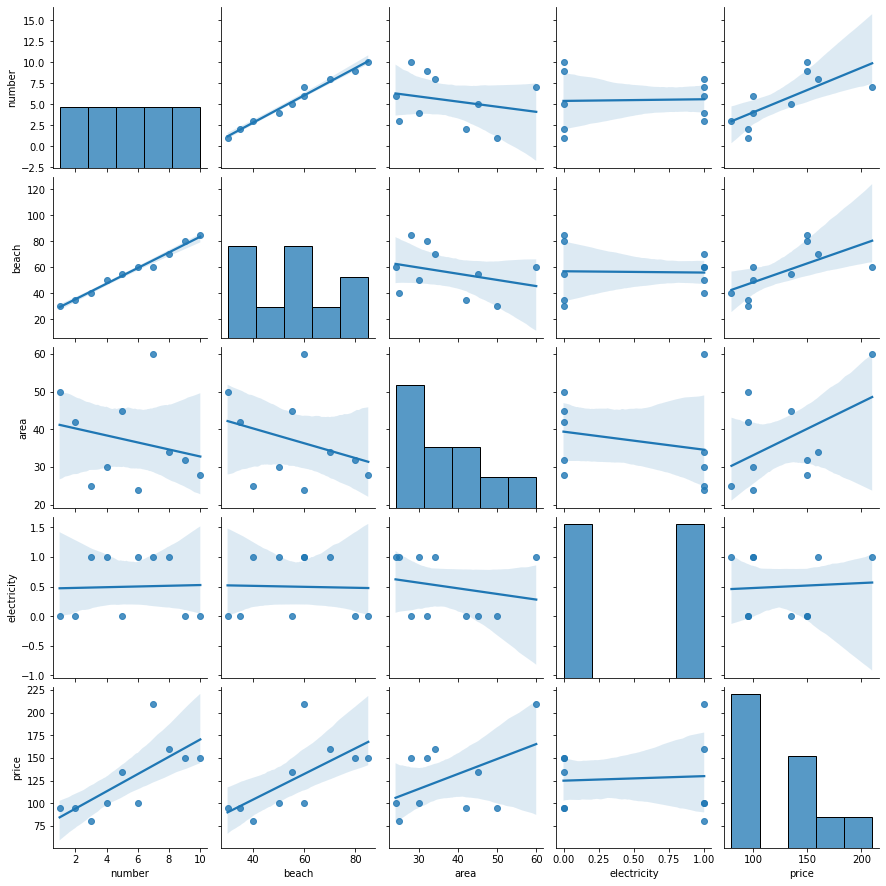

In [3]:
### Study dependencies between the column variables of the data using scatter charts of the seaborn library.

sns.pairplot(df, kind='reg')

<AxesSubplot:>

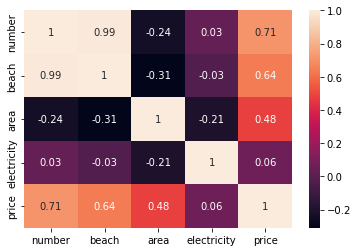

In [4]:
### Study dependencies between the column variables of the data using correlation coefficients.

correlation_matrix = df.corr().round(2)

### We color the coefficients background color using the heatmat function of the seaborn library.

sns.heatmap(data = correlation_matrix, annot = True)

In [5]:
### prepare the data for regression analysis.

### Feature matrix X

X = df[['beach', 'area', 'electricity']]

### target variable, i.e., dependent/pericted variable

y = df['price']

In [6]:
### Import the linear regression model

from sklearn.linear_model import LinearRegression

### Fit the model into the data.

model = LinearRegression().fit(X, y)

Now analyze the results.

In [7]:
### Slope of the regression line.

model.coef_

array([ 1.9750098 ,  2.77578415, 20.29877373])

In [8]:
### Intercept of the regression line.

model.intercept_

-96.94145434036429

In [9]:
### R squared value

model.score(X, y)

0.9819136190845802

Text(0, 0.5, 'Deviation from the realized values')

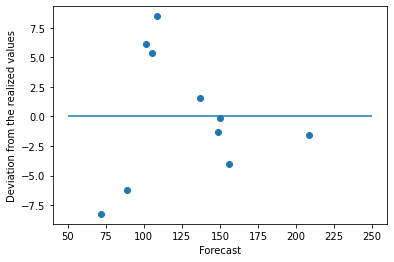

In [10]:
### Error values of the model as scatter chart.

plt.scatter(model.predict(X), model.predict(X)-y)

### Add a horisontal line at the zero deviation.

plt.hlines(y = 0, xmin = 50, xmax = 250)

### Add axis names.

plt.xlabel('Forecast')
plt.ylabel('Deviation from the realized values')

Text(0, 0.5, 'Forecast')

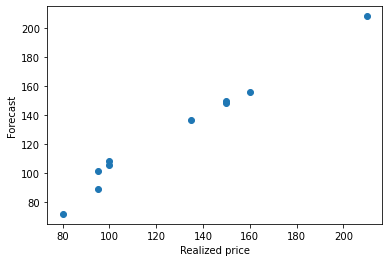

In [11]:
### Correspondence between realized prices and predictions by the model as a scatter chart.

plt.scatter(y, model.predict(X))

plt.xlabel('Realized price')
plt.ylabel('Forecast')

In [12]:
### Price forecast for the new data.

Xnew = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/cabinnew.xlsx')

Xnew['Price forecast'] = model.predict(Xnew)

Xnew

,beach,area,electricity,Price forecast
0,100,90,1,370.678873
1,60,56,1,197.301820
2,30,25,0,31.703444
3,50,30,0,85.082560


In [13]:
### More usual regression statistics from the statsmodel library.

import statsmodels.api as sm

### Next line is needed for the constant term in the model.

X = sm.add_constant(X)

### Fitting the model using the ordinary least squares method

model_sm = sm.OLS(y, X).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     108.6
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.29e-05
Time:                        19:26:04   Log-Likelihood:                -30.630
No. Observations:                  10   AIC:                             69.26
Df Residuals:                       6   BIC:                             70.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -96.9415     12.767     -7.593      

C:\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>